### John Lee
### BrainStation, Data Science

# Notebook Part 2






This is a continuation of feature engineering from the previous notebook. We will clean the data and perform EDA, as well as add new features when needed.

--- 

## Data Clean, EDA, and Feature Engineering


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('df1.csv')
pd.set_option('display.max_columns', None)


We have loaded the needed packages as well as the data exported from the previous notebook with the feature engineered depedent variable.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842322 entries, 0 to 1842321
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   URL                 object 
 1   GameType            object 
 2   Location            object 
 3   Date                object 
 4   Time                object 
 5   WinningTeam         object 
 6   Quarter             int64  
 7   SecLeft             int64  
 8   AwayTeam            object 
 9   AwayPlay            object 
 10  AwayScore           int64  
 11  HomeTeam            object 
 12  HomePlay            object 
 13  HomeScore           int64  
 14  Shooter             object 
 15  ShotType            object 
 16  ShotOutcome         object 
 17  ShotDist            float64
 18  Fouler              object 
 19  Rebounder           object 
 20  ReboundType         object 
 21  ViolationPlayer     object 
 22  TimeoutTeam         object 
 23  TurnoverPlayer      object 
 24  GameID              int6

In [4]:
df.head(45)

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,AwayScore,HomeTeam,HomePlay,HomeScore,Shooter,ShotType,ShotOutcome,ShotDist,Fouler,Rebounder,ReboundType,ViolationPlayer,TimeoutTeam,TurnoverPlayer,GameID,FirstBasketAfterTO
0,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,720,BOS,Jump ball: K. Love vs. A. Horford (K. Irving g...,0,CLE,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,704,BOS,K. Irving makes 2-pt jump shot from 10 ft (ass...,2,CLE,0,0,K. Irving - irvinky01,2-pt jump shot,make,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
2,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,687,BOS,0,2,CLE,D. Rose misses 2-pt layup from 1 ft (block by ...,0,D. Rose - rosede01,2-pt layup,miss,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,683,BOS,Defensive rebound by A. Horford,2,CLE,0,0,NaN,NaN,NaN,NaN,NaN,A. Horford - horfoal01,defensive,NaN,NaN,NaN,1,NaN
4,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,681,BOS,G. Hayward misses 3-pt jump shot from 25 ft,2,CLE,0,0,G. Hayward - haywago01,3-pt jump shot,miss,25.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,678,BOS,0,2,CLE,Defensive rebound by D. Rose,0,NaN,NaN,NaN,NaN,NaN,D. Rose - rosede01,defensive,NaN,NaN,NaN,1,NaN
6,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,662,BOS,0,2,CLE,K. Love misses 2-pt jump shot from 15 ft,0,K. Love - loveke01,2-pt jump shot,miss,15.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
7,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,659,BOS,Defensive rebound by J. Brown,2,CLE,0,0,NaN,NaN,NaN,NaN,NaN,J. Brown - brownja02,defensive,NaN,NaN,NaN,1,NaN
8,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,651,BOS,J. Tatum misses 2-pt layup from 2 ft (block by...,2,CLE,0,0,J. Tatum - tatumja01,2-pt layup,miss,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
9,/boxscores/201710170CLE.html,regular,Quicken Loans Arena Cleveland Ohio,October 17 2017,8:01 PM,CLE,1,651,BOS,Offensive rebound by Team,2,CLE,0,0,NaN,NaN,NaN,NaN,NaN,Team,offensive,NaN,NaN,NaN,1,NaN


We can see that our dependent variable, "FirstBasketAfterTO" has been successfully integrated to our dataframe. We will move onto EDA.

In [5]:
df.duplicated().sum()/df.shape[0] 

0.0009976540474466462

In [6]:
df['GameID'].unique()

array([   1,    2,    3, ..., 3973, 3974, 3975], dtype=int64)

In [7]:
print(sorted(df['AwayTeam'].unique()))
print(sorted(df['HomeTeam'].unique()))


['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']
['ATL', 'BOS', 'BRK', 'CHI', 'CHO', 'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS']


We can see that less than 0.1% of the data has duplicate rows. These can be explained by rows where it shows the end of game since same combination of teams face each other multiple times in the four seasons. Additionally, there were a total of 3975 games played through 4 seasons. We see that there are 30 unique team names for both the away team and home team, which is correct as the NBA has 30 teams.

In [8]:
df['Quarter'].value_counts()

4    471639
2    465943
3    449909
1    441150
5     11840
6      1461
7       257
8       123
Name: Quarter, dtype: int64

Although each NBA game consists of 4 quarters, we see that there were instances of plays that ranged up to the 8th quarter. This is due to the multiple overtime games that happened in the four seasons worth of data.

We now binarize the columns that are categorical but have two instances for easy interpretation. Additionally, we will simplify "ShotType" to get rid of string values for plotting purposes.

In [9]:
df['WinningTeam'] = np.where(df['WinningTeam'] == df['HomeTeam'],1,0)

In [10]:
df['GameType'] = np.where(df['GameType'] == 'regular',0,1).astype('uint8')

In [11]:
df['GameType'].value_counts()

0    1728913
1     113409
Name: GameType, dtype: int64

In [12]:
df['ShotType'] = df['ShotType'].replace(np.nan, 0)
df['ShotType'] = df['ShotType'].str.extract('(\d+)', expand=False)

In [13]:
df['ShotType']

0          NaN
1            2
2            2
3          NaN
4            3
          ... 
1842317      2
1842318    NaN
1842319    NaN
1842320    NaN
1842321    NaN
Name: ShotType, Length: 1842322, dtype: object

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df['Date']

0         2017-10-17
1         2017-10-17
2         2017-10-17
3         2017-10-17
4         2017-10-17
             ...    
1842317   2021-01-15
1842318   2021-01-15
1842319   2021-01-15
1842320   2021-01-15
1842321   2021-01-15
Name: Date, Length: 1842322, dtype: datetime64[ns]

We additionally drop more columns as we see that these seem irrelevant. It was thought that the fouler and the time of an instance did not affect the result of a shot.

In [16]:
%%time
df = df.drop(['Fouler','Time'], axis =1)


Wall time: 353 ms


---
## Visuals

We now take a look at interesting insights in regards to general basketball shot attempts and plot them. We will take a look at the average shot percentage separated by type of shot, by each team separated by home and away, and compare it to the entire league average. 

### Shot Percentage of Teams - Away and Home

In [17]:
from statistics import mean

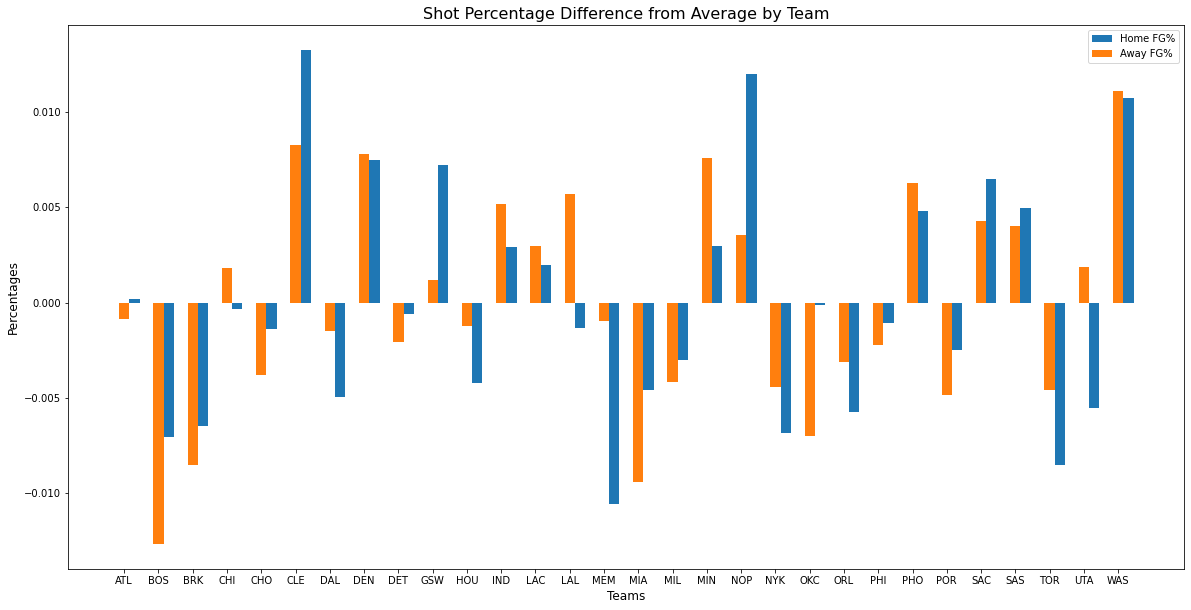

Wall time: 1min 28s


In [18]:
%%time
from statistics import mean

team_list = sorted(df['AwayTeam'].unique())

plt.figure(figsize=(20, 10))

percentage_list2_away = []
percentage_list3_away = []
percentage_list_away = []
for i in team_list:
    makes2 = df[(df['ShotType'] == '2') & (df['ShotOutcome'] == 'make') & (df['AwayTeam'] == i)]['AwayTeam'].count()
    attempts2 = (df[(df['ShotType'] == '2') & (df['ShotOutcome'] == 'miss') & (df['AwayTeam'] == i)]['AwayTeam'].count()) + makes2
    percentage2 = makes2/attempts2
    percentage_list2_away.append(percentage2)
[round(num,3) for num in percentage_list2_away]

for i in team_list:
    makes3 = df[(df['ShotType'] == '3') & (df['ShotOutcome'] == 'make') & (df['AwayTeam'] == i)]['AwayTeam'].count()
    attempts3 = (df[(df['ShotType'] == '3') & (df['ShotOutcome'] == 'miss') & (df['AwayTeam'] == i)]['AwayTeam'].count()) + makes3
    percentage3 = makes3/attempts3
    percentage_list3_away.append(percentage3)
[round(num,3) for num in percentage_list3_away]

for i in team_list:
    makes = df[(df['ShotOutcome'] == 'make') & (df['AwayTeam'] == i)]['AwayTeam'].count()
    attempts = (df[(df['ShotOutcome'] =='miss') & (df['AwayTeam'] == i)]['AwayTeam'].count()) + makes
    percentage = makes/attempts
    percentage_list_away.append(percentage)
[round(num,3) for num in percentage_list_away]


percentage_list2 = []
percentage_list3 = []
percentage_list = []
for i in team_list:
    makes2 = df[(df['ShotType'] == '2') & (df['ShotOutcome'] == 'make') & (df['HomeTeam'] == i)]['HomeTeam'].count()
    attempts2 = (df[(df['ShotType'] == '2') & (df['ShotOutcome'] == 'miss') & (df['HomeTeam'] == i)]['HomeTeam'].count()) + makes2
    percentage2 = makes2/attempts2
    percentage_list2.append(percentage2)
[round(num,3) for num in percentage_list2]

for i in team_list:
    makes3 = df[(df['ShotType'] == '3') & (df['ShotOutcome'] == 'make') & (df['HomeTeam'] == i)]['HomeTeam'].count()
    attempts3 = (df[(df['ShotType'] == '3') & (df['ShotOutcome'] == 'miss') & (df['HomeTeam'] == i)]['HomeTeam'].count()) + makes3
    percentage3 = makes3/attempts3
    percentage_list3.append(percentage3)
[round(num,3) for num in percentage_list3]

for i in team_list:
    makes = df[(df['ShotOutcome'] == 'make') & (df['HomeTeam'] == i)]['HomeTeam'].count()
    attempts = (df[(df['ShotOutcome'] =='miss') & (df['HomeTeam'] == i)]['HomeTeam'].count()) + makes
    percentage = makes/attempts
    percentage_list.append(percentage)
[round(num,3) for num in percentage_list]
x1 = np.arange(len(team_list))
plt.bar(x1+.3, percentage_list-(mean(percentage_list)), .3)

x = np.arange(len(team_list))
plt.bar(x, (percentage_list_away-mean(percentage_list_away)), .3)
#plt.bar(x-.3, (percentage_list2_away-mean(percentage_list2_away)), .3)
#plt.bar(x+.3, (percentage_list3_away-mean(percentage_list3_away)), .3)
plt.xticks(x, team_list)
plt.title('Shot Percentage Difference from Average by Team', fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Percentages", fontsize=12)
plt.legend(["Home FG%", "Away FG%"])
plt.savefig('ShotPercentageDifFromAvg.png')
plt.show()


Interestingly enough, we saw that the majority of teams either below league average in both home and away games or above average in both home and away games. We saw that only a handful of teams (CHI, LAL, and UTA) shot below average at home but above average away. Overall, we saw that even if there was a difference in shot percentages, it was less than 2% above or below average, which indicates that there is very little correlation of home and away games to shots being made.

### Shot Percentage of Teams after Timeout - Offense and Defense

Now, we will find the shot percentages of shots taken after a timeout to see which teams are above average. Additionally, we will find out which teams are average in terms of decreasing their opponent's shot percentage after a timeout, as in every timeout both the offense and defense has a chance to set up a play.

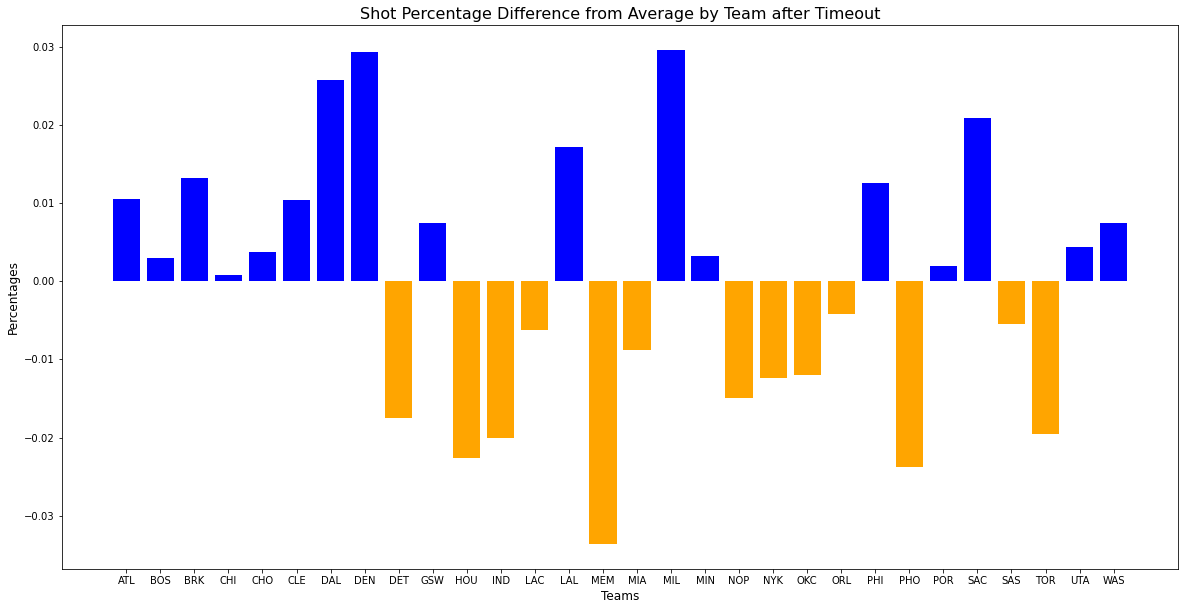

Wall time: 4.53 s


In [19]:
%%time
# the percentages of shots that a team would score after they call a timeout
fg_percentage_list = []
two_percentage_list = []
three_percentage_list = []
for i in team_list:
    two_pt_made = 1
    two_pt_attempted = 1
    three_pt_made = 1
    three_pt_attempted = 1

    for j in df[df.TimeoutTeam == i]['TimeoutTeam'].index:
        if df['TimeoutTeam'][j] == df['HomeTeam'][j] and df['FirstBasketAfterTO'][j] == '2HMiss':
            two_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['HomeTeam'][j] and df['FirstBasketAfterTO'][j] == '3HMiss':
            three_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['HomeTeam'][j] and df['FirstBasketAfterTO'][j] == '2Home':
            two_pt_made += 1
            two_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['HomeTeam'][j] and df['FirstBasketAfterTO'][j] == '3Home':
            three_pt_made += 1
            three_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['AwayTeam'][j] and df['FirstBasketAfterTO'][j] == '2AMiss':
            two_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['AwayTeam'][j] and df['FirstBasketAfterTO'][j] == '3AMiss':
            three_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['AwayTeam'][j] and df['FirstBasketAfterTO'][j] == '2Away':
            two_pt_made += 1
            two_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['AwayTeam'][j] and df['FirstBasketAfterTO'][j] == '3Away':
            three_pt_made += 1
            three_pt_attempted += 1
            
    fg_percentage = ((two_pt_made-1)+(three_pt_made-1))/((two_pt_attempted-1)+(three_pt_attempted-1))
    two_percentage = ((two_pt_made-1)/(two_pt_attempted-1))
    three_percentage = ((three_pt_made-1)/(three_pt_attempted-1))
    
    fg_percentage_list.append(fg_percentage)
    two_percentage_list.append(two_percentage)
    three_percentage_list.append(three_percentage)
    
[round(num,3) for num in fg_percentage_list]
[round(num,3) for num in two_percentage_list]
[round(num,3) for num in three_percentage_list]
plt.figure(figsize=(20, 10))
x = np.arange(len(team_list))
plt.bar(x, np.array(fg_percentage_list)-mean(fg_percentage_list),color=["blue" if i > 0 else "orange" for i in np.array(fg_percentage_list)-mean(fg_percentage_list)])
#plt.bar(x-.3, np.array(two_percentage_list)-mean(two_percentage_list), .3)
#plt.bar(x+.3, np.array(three_percentage_list)-mean(three_percentage_list), .3)

plt.xticks(x, team_list)
plt.title('Shot Percentage Difference from Average by Team after Timeout', fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Percentages", fontsize=12)
plt.savefig('ShotPercentageDifFromAvgAfterTO.png')
plt.show()
    
            
            

        
    

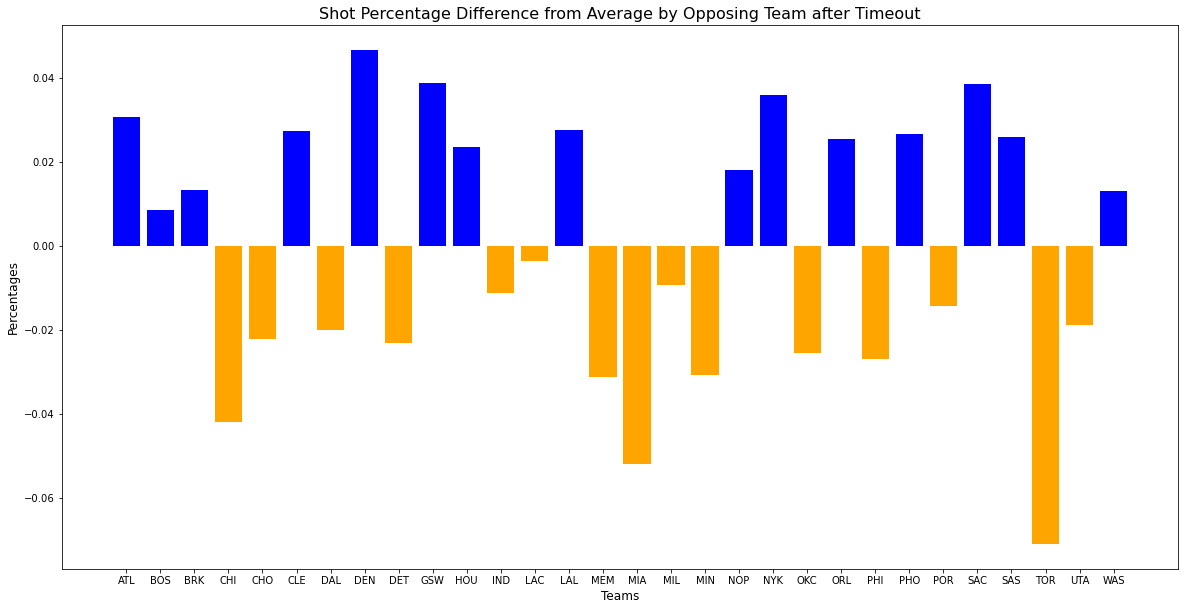

Wall time: 5.5 s


In [20]:
%%time
# the percentages of shots that a opposing team would score after friendly timeout
fg_percentage_list_d = []
two_percentage_list_d = []
three_percentage_list_d = []
for i in team_list:
    two_pt_made = 1
    two_pt_attempted = 1
    three_pt_made = 1
    three_pt_attempted = 1

    for j in df[df.TimeoutTeam == i]['TimeoutTeam'].index:
        if df['TimeoutTeam'][j] == df['AwayTeam'][j] and df['FirstBasketAfterTO'][j] == '2HMiss':
            two_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['AwayTeam'][j] and df['FirstBasketAfterTO'][j] == '3HMiss':
            three_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['AwayTeam'][j] and df['FirstBasketAfterTO'][j] == '2Home':
            two_pt_made += 1
            two_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['AwayTeam'][j] and df['FirstBasketAfterTO'][j] == '3Home':
            three_pt_made += 1
            three_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['HomeTeam'][j] and df['FirstBasketAfterTO'][j] == '2AMiss':
            two_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['HomeTeam'][j] and df['FirstBasketAfterTO'][j] == '3AMiss':
            three_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['HomeTeam'][j] and df['FirstBasketAfterTO'][j] == '2Away':
            two_pt_made += 1
            two_pt_attempted += 1
        elif df['TimeoutTeam'][j] == df['HomeTeam'][j] and df['FirstBasketAfterTO'][j] == '3Away':
            three_pt_made += 1
            three_pt_attempted += 1
            
    fg_percentage = ((two_pt_made-1)+(three_pt_made-1))/((two_pt_attempted-1)+(three_pt_attempted-1))
    two_percentage = ((two_pt_made-1)/(two_pt_attempted-1))
    three_percentage = ((three_pt_made-1)/(three_pt_attempted-1))
    
    fg_percentage_list_d.append(fg_percentage)
    two_percentage_list_d.append(two_percentage)
    three_percentage_list_d.append(three_percentage)

[round(num,3) for num in fg_percentage_list_d]
[round(num,3) for num in two_percentage_list_d]
[round(num,3) for num in three_percentage_list_d]    
plt.figure(figsize=(20, 10))
x = np.arange(len(team_list))
plt.bar(x, np.array(fg_percentage_list_d)-mean(fg_percentage_list_d), color=["blue" if i > 0 else "orange" for i in np.array(fg_percentage_list_d)-mean(fg_percentage_list_d)])

        
plt.xticks(x, team_list)
plt.title('Shot Percentage Difference from Average by Opposing Team after Timeout', fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Percentages", fontsize=12)
plt.savefig('OpposingShotPercentageDifFromAvgAfterTO.png')
plt.show()

We saw that interestingly enough, 13 teams shot below average after a timeout call, which may indicate that on average, their offensive plays may need room for improvement. We saw however, that the range in which the percentage increase or decrease to the league average compared to a normal shot was 3%,  relative to less than 2% range of normal shots which indicates that there is more of a disparity in shot percentage after timeouts amongst teams.

We also saw that surprisingly, when a timeout was used, the defensive impact was much greater than the offensive. We saw that the range in a team's opponent's shot percentages compared to the league average was much higher, with one team  holding their opponents to more than 6% less compared to the league average. 


We now compare the percentages to find the teams that had a difference in shot percentage from home and away, as well as regular shots and shots after timeouts.

In [21]:
percentage_list2_all = []
percentage_list3_all = []
percentage_list_all = []
for i in team_list:
    makes2 = (df[(df['ShotType'] == '2') & (df['ShotOutcome'] == 'make') & (df['HomeTeam'] == i)]['HomeTeam'].count()) + (df[(df['ShotType'] == '2') & (df['ShotOutcome'] == 'make') & (df['AwayTeam'] == i)]['AwayTeam'].count())
    attempts2 = ((df[(df['ShotType'] == '2') & (df['ShotOutcome'] == 'miss') & (df['HomeTeam'] == i)]['HomeTeam'].count())) +((df[(df['ShotType'] == '2') & (df['ShotOutcome'] == 'miss') & (df['AwayTeam'] == i)]['AwayTeam'].count())) + makes2
    percentage2 = makes2/attempts2
    percentage_list2_all.append(percentage2)
[round(num,3) for num in percentage_list2_all]

for i in team_list:
    makes3 = (df[(df['ShotType'] == '3') & (df['ShotOutcome'] == 'make') & (df['HomeTeam'] == i)]['HomeTeam'].count()) + (df[(df['ShotType'] == '3') & (df['ShotOutcome'] == 'make') & (df['AwayTeam'] == i)]['AwayTeam'].count())
    attempts3 = (df[(df['ShotType'] == '3') & (df['ShotOutcome'] == 'miss') & (df['HomeTeam'] == i)]['HomeTeam'].count())+((df[(df['ShotType'] == '3') & (df['ShotOutcome'] == 'miss') & (df['AwayTeam'] == i)]['AwayTeam'].count())) + makes3
    percentage3 = makes3/attempts3
    percentage_list3_all.append(percentage3)
[round(num,3) for num in percentage_list3_all]

for i in team_list:
    makes = (df[(df['ShotOutcome'] == 'make') & (df['HomeTeam'] == i)]['HomeTeam'].count()) + (df[(df['ShotOutcome'] == 'make') & (df['AwayTeam'] == i)]['AwayTeam'].count())
    attempts = (df[(df['ShotOutcome'] =='miss') & (df['HomeTeam'] == i)]['HomeTeam'].count())+ ((df[(df['ShotOutcome'] =='miss') & (df['AwayTeam'] == i)]['AwayTeam'].count())) + makes
    percentage = makes/attempts
    percentage_list_all.append(percentage)
[round(num,3) for num in percentage_list_all]

d = {'Team': team_list, 'AwayOverall%': percentage_list_away, 'Away2pt%':percentage_list2_away, 
     'Away3pt%':percentage_list3_away, 'HomeOverall%':percentage_list, 
     'Home2pt%':percentage_list2,'Home3pt%':percentage_list3, 
     'TeamOverall%':percentage_list_all,'Team2pt%':percentage_list2_all,'Team3pt%':percentage_list3_all,
     'Overall%afterTO':fg_percentage_list, '2pt%afterTO': two_percentage_list,'3pt%afterTO': three_percentage_list, 
     'LeagueAvg%afterTO':mean(fg_percentage_list), 'LeagueAvg2%afterTO':mean(two_percentage_list), 'LeagueAvg3%afterTO':mean(three_percentage_list),
     'OpponentOverall%afterTO':fg_percentage_list_d, 'Opponent2pt%afterTO': two_percentage_list_d,'Opponent3pt%afterTO': three_percentage_list_d,
     'LeagueOpponentAvg%afterTO':mean(fg_percentage_list_d), 'LeagueOpponentAvg2%afterTO':mean(two_percentage_list_d), 'LeagueOpponentAvg3%afterTO':mean(three_percentage_list_d)}
df_shot_percentages = pd.DataFrame(data=d)
df_shot_percentages.head()



,Team,AwayOverall%,Away2pt%,Away3pt%,HomeOverall%,Home2pt%,Home3pt%,TeamOverall%,Team2pt%,Team3pt%,Overall%afterTO,2pt%afterTO,3pt%afterTO,LeagueAvg%afterTO,LeagueAvg2%afterTO,LeagueAvg3%afterTO,OpponentOverall%afterTO,Opponent2pt%afterTO,Opponent3pt%afterTO,LeagueOpponentAvg%afterTO,LeagueOpponentAvg2%afterTO,LeagueOpponentAvg3%afterTO
0,ATL,0.459010,0.521643,0.355276,0.460010,0.523234,0.356689,0.459513,0.522441,0.355990,0.438766,0.473934,0.383663,0.428265,0.484533,0.335934,0.490251,0.598214,0.311111,0.459625,0.530869,0.334811
1,BOS,0.447206,0.504592,0.351485,0.452768,0.512505,0.352617,0.450003,0.508575,0.352053,0.431202,0.497585,0.330900,0.428265,0.484533,0.335934,0.468144,0.491071,0.430657,0.459625,0.530869,0.334811
2,BRK,0.451353,0.509582,0.352764,0.453322,0.510575,0.354886,0.452352,0.510087,0.353836,0.441441,0.535484,0.322449,0.428265,0.484533,0.335934,0.472973,0.541126,0.359712,0.459625,0.530869,0.334811
3,CHI,0.461715,0.518089,0.362947,0.459479,0.518362,0.355837,0.460604,0.518225,0.359420,0.429098,0.458047,0.370474,0.428265,0.484533,0.335934,0.417683,0.517949,0.270677,0.459625,0.530869,0.334811
4,CHO,0.456074,0.513393,0.360752,0.458441,0.515711,0.358634,0.457232,0.514536,0.359732,0.432024,0.490879,0.341026,0.428265,0.484533,0.335934,0.437500,0.504902,0.300000,0.459625,0.530869,0.334811


In [22]:
df_shot_percentages[df_shot_percentages['HomeOverall%']>df_shot_percentages['AwayOverall%']][['Team','AwayOverall%','HomeOverall%']]

,Team,AwayOverall%,HomeOverall%
0,ATL,0.459010,0.460010
1,BOS,0.447206,0.452768
2,BRK,0.451353,0.453322
4,CHO,0.456074,0.458441
5,CLE,0.468146,0.473075
8,DET,0.457795,0.459186
9,GSW,0.461064,0.467028
15,MIA,0.450455,0.455237
16,MIL,0.455742,0.456791
18,NOP,0.463425,0.471795


In [23]:
df_shot_percentages[df_shot_percentages['Overall%afterTO']>df_shot_percentages['TeamOverall%']][['Team','Overall%afterTO','TeamOverall%']]

,Team,Overall%afterTO,TeamOverall%
16,MIL,0.457831,0.456263


In [24]:
df_shot_percentages[df_shot_percentages['2pt%afterTO']>df_shot_percentages['Team2pt%']][['Team','2pt%afterTO','Team2pt%']]

,Team,2pt%afterTO,Team2pt%
2,BRK,0.535484,0.510087
10,HOU,0.539801,0.536957


In [25]:
df_shot_percentages[df_shot_percentages['3pt%afterTO']>df_shot_percentages['Team3pt%']][['Team','3pt%afterTO','Team3pt%']]

,Team,3pt%afterTO,Team3pt%
0,ATL,0.383663,0.355990
3,CHI,0.370474,0.359420
6,DAL,0.378270,0.353446
12,LAC,0.376963,0.362351
13,LAL,0.356984,0.347166


Interestingly, it is known that usually teams play better at home, but only half the teams shot better from home than away and the margin in the differences were very small. This may indicate that teams don't necessarily shoot better at home, but they play harder defense and feed off the encouraging energy from their home court. 

Additionally, only a handful of teams shot a higher 2pt or 3pt shot percentage after a timeout and only one team shot better overall, which is interesting as it is assumed it should increase since the offense draws up a play for the optimal shot. This may indicate that the value of a timeout might actually favor the defense, as the defense also has time to draw up a play to prepare for the offense.

### Shot Distance Distribution

We will now look at the shot distance distribution of regular shots and shots after a timeout to see if there is a significant difference.

In [26]:
%%time
df_shotdistance = pd.read_csv('shotdistance.csv')
df['ShotDistanceOfFirstBasket']  = df_shotdistance['ShotDistanceOfFirstBasket']

Wall time: 8 s


In [27]:
shotdistanceTO = df[df['ShotDistanceOfFirstBasket']!= 0]['ShotDistanceOfFirstBasket'].value_counts().sort_index()
shotdistance = df[df['ShotDist']!= 0]['ShotDist'].value_counts().sort_index().astype(int, copy=True)


In [28]:
median_shot_distTO = df[df['ShotDistanceOfFirstBasket']!= 0]['ShotDistanceOfFirstBasket'].sort_index().median()
median_shot_dist = df[df['ShotDist']!= 0]['ShotDist'].sort_index().median()

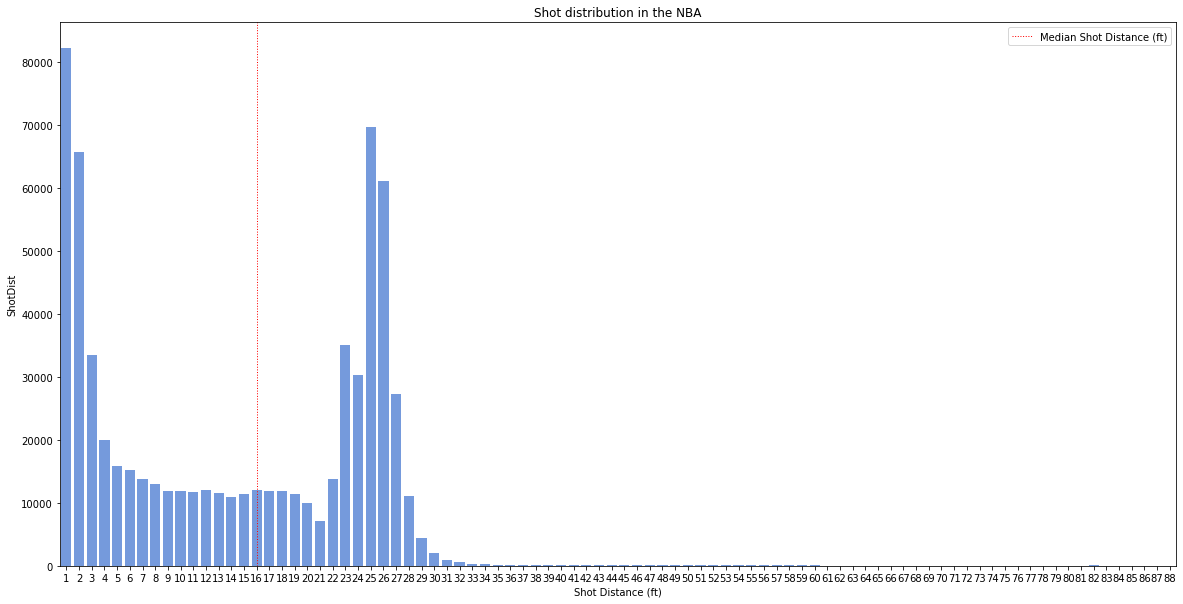

In [29]:
plt.figure(figsize=(20, 10))

plt.title('Shot distribution in the NBA')
plt.xlabel("Shot Distance (ft)")
plt.ylabel("Count of Shots")
plt.axvline(x = median_shot_dist, linewidth=1 ,color = 'r', linestyle =':')
sns.barplot(x=shotdistance.index.astype(int, copy=True), y=shotdistance, data=df, color='cornflowerblue')
plt.legend(['Median Shot Distance (ft)'])
plt.savefig('ShotDist.png')
plt.show()

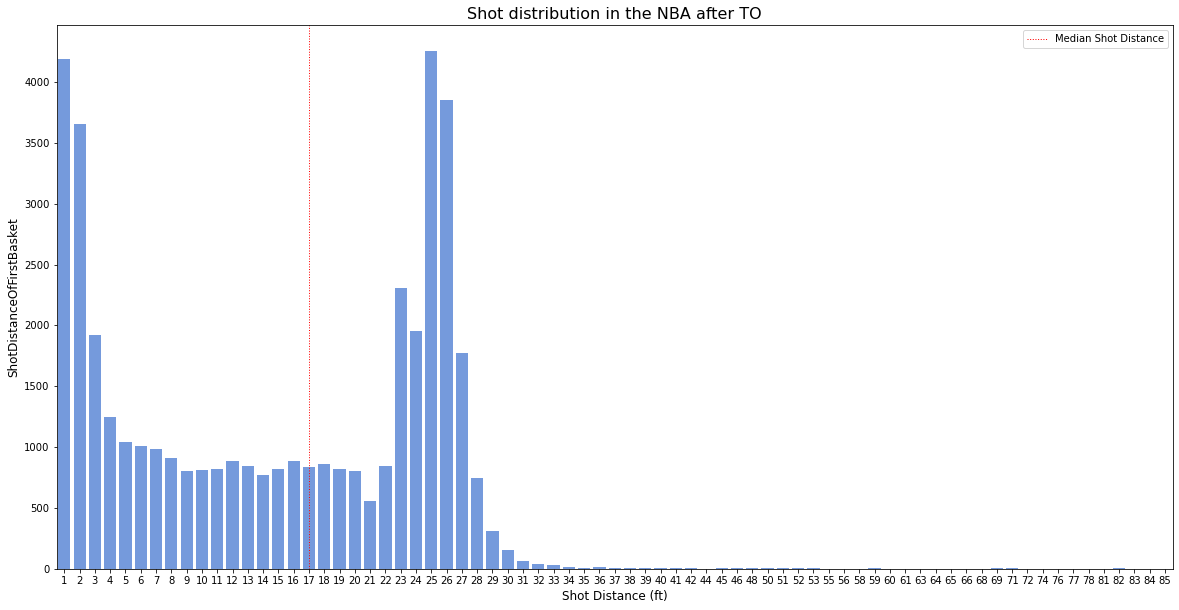

In [30]:
plt.figure(figsize=(20, 10))

plt.title('Shot distribution in the NBA after TO', fontsize=16)
plt.xlabel("Shot Distance (ft)",fontsize=12)
plt.ylabel("Count of Shots", fontsize=12)
plt.axvline(x = median_shot_distTO, linewidth=1 ,color = 'r', linestyle =':')
sns.barplot(x=shotdistanceTO.index, y=shotdistanceTO, data=df,color='cornflowerblue')
plt.legend(['Median Shot Distance'])
plt.savefig('ShotDistAfterTO.png')
plt.show()

We saw that the distribution shape of the plot is the same between regular shots and shots after timeouts, but we see that the median shot distance actually increased for shots after timeouts compared to regular shots, which may indicate that plays are drawn up for the most optimal shot which can arguably be a open 3pt shot attempt. This may also be the reason why the overall shot percentage after a timeout was lower than a regular shot except for one team, because more 3pt shots are attempted rather than 2pt shots, which would decrease the shot percentage for shots after a timeout.

# Modeling

Now that we have seen the different characteristics of shots taken by NBA teams, we will try to predict the outcome of a shot based on when a timeout was called during the game. Since we are predicting whether a shot will be made or missed, classifer models will be used for the prediction. The following models will be used -

   1. Logistic Regression
   2. Decision Tree
   3. SVC 
   4. KNN 

We will first run the models separately without any hyperparameter tuning, then incorporate a grid search to find the optimal model and hyperparameter. Once the optimal model and hyperparameter is chosen, we will then evaluate the model's true performance with a confusion matrix and classification report to assess the reliability of the results.




--- 

### Data preparation 

We will now prepare the data and get rid of the null rows and the null value columns that will be inputted to the models.

In [31]:
df_timeout = df.dropna(subset=['TimeoutTeam'])
drop_list = ['URL','Shooter','ShotType','ShotOutcome', 'Rebounder', 'ReboundType', 'ViolationPlayer','TurnoverPlayer','AwayPlay','HomePlay','ShotDist']
df_timeout = df_timeout.drop(drop_list, axis = 1)

df_timeout=df_timeout.reset_index(drop=True)

df_timeout.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43503 entries, 0 to 43502
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   GameType                   43503 non-null  uint8         
 1   Location                   43503 non-null  object        
 2   Date                       43503 non-null  datetime64[ns]
 3   WinningTeam                43503 non-null  int32         
 4   Quarter                    43503 non-null  int64         
 5   SecLeft                    43503 non-null  int64         
 6   AwayTeam                   43503 non-null  object        
 7   AwayScore                  43503 non-null  int64         
 8   HomeTeam                   43503 non-null  object        
 9   HomeScore                  43503 non-null  int64         
 10  TimeoutTeam                43503 non-null  object        
 11  GameID                     43503 non-null  int64         
 12  Firs

C:\Users\User\AppData\Local\Temp/ipykernel_17948/2562418808.py:7: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_timeout.info(null_counts=True)


In [32]:
df_timeout=df_timeout.dropna()
df_timeout.info(null_counts=True)
df_timeout=df_timeout.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43198 entries, 0 to 43502
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   GameType                   43198 non-null  uint8         
 1   Location                   43198 non-null  object        
 2   Date                       43198 non-null  datetime64[ns]
 3   WinningTeam                43198 non-null  int32         
 4   Quarter                    43198 non-null  int64         
 5   SecLeft                    43198 non-null  int64         
 6   AwayTeam                   43198 non-null  object        
 7   AwayScore                  43198 non-null  int64         
 8   HomeTeam                   43198 non-null  object        
 9   HomeScore                  43198 non-null  int64         
 10  TimeoutTeam                43198 non-null  object        
 11  GameID                     43198 non-null  int64         
 12  Firs

C:\Users\User\AppData\Local\Temp/ipykernel_17948/3144749139.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_timeout.info(null_counts=True)


In [33]:
df_timeout

,GameType,Location,Date,WinningTeam,Quarter,SecLeft,AwayTeam,AwayScore,HomeTeam,HomeScore,TimeoutTeam,GameID,FirstBasketAfterTO,ShotDistanceOfFirstBasket
0,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,1,419,BOS,10,CLE,9,CLE,1,2Away,1
1,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,1,158,BOS,17,CLE,22,BOS,1,3AMiss,25
2,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,2,569,BOS,21,CLE,34,BOS,1,2AMiss,2
3,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,2,330,BOS,30,CLE,44,CLE,1,2HMiss,3
4,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,3,675,BOS,42,CLE,54,CLE,1,2Home,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43193,0,Vivint Smart Home Arena Salt Lake City Utah,2021-01-15,1,3,371,ATL,65,UTA,76,ATL,3975,2Home,2
43194,0,Vivint Smart Home Arena Salt Lake City Utah,2021-01-15,1,3,230,ATL,66,UTA,82,ATL,3975,2Away,21
43195,0,Vivint Smart Home Arena Salt Lake City Utah,2021-01-15,1,3,121,ATL,74,UTA,82,UTA,3975,2HMiss,19
43196,0,Vivint Smart Home Arena Salt Lake City Utah,2021-01-15,1,4,639,ATL,74,UTA,96,ATL,3975,2AMiss,4


In [34]:
timeoutshot_dict = {'2Away':1,'2Home':1,'3Away':1,'3Home':1,'2AMiss':0,'2HMiss':0,'3AMiss':0, '3HMiss':0}

In [35]:
df_timeout['FirstBasketAfterTO'] = df_timeout['FirstBasketAfterTO'].replace(timeoutshot_dict)
df_timeout['HomeTeamLeading'] = np.where(df_timeout['HomeScore'] > df_timeout['AwayScore'], 1, 0)
df_timeout['LastMinQuarter'] = np.where(df_timeout['SecLeft'] > 60, 0, 1)
df_timeout['ClutchTime'] = np.where((df_timeout['LastMinQuarter'] == 1) & (df_timeout['Quarter'] == 4), 1,0)
df_timeout

,GameType,Location,Date,WinningTeam,Quarter,SecLeft,AwayTeam,AwayScore,HomeTeam,HomeScore,TimeoutTeam,GameID,FirstBasketAfterTO,ShotDistanceOfFirstBasket,HomeTeamLeading,LastMinQuarter,ClutchTime
0,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,1,419,BOS,10,CLE,9,CLE,1,1,1,0,0,0
1,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,1,158,BOS,17,CLE,22,BOS,1,0,25,1,0,0
2,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,2,569,BOS,21,CLE,34,BOS,1,0,2,1,0,0
3,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,2,330,BOS,30,CLE,44,CLE,1,0,3,1,0,0
4,0,Quicken Loans Arena Cleveland Ohio,2017-10-17,1,3,675,BOS,42,CLE,54,CLE,1,1,11,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43193,0,Vivint Smart Home Arena Salt Lake City Utah,2021-01-15,1,3,371,ATL,65,UTA,76,ATL,3975,1,2,1,0,0
43194,0,Vivint Smart Home Arena Salt Lake City Utah,2021-01-15,1,3,230,ATL,66,UTA,82,ATL,3975,1,21,1,0,0
43195,0,Vivint Smart Home Arena Salt Lake City Utah,2021-01-15,1,3,121,ATL,74,UTA,82,UTA,3975,0,19,1,0,0
43196,0,Vivint Smart Home Arena Salt Lake City Utah,2021-01-15,1,4,639,ATL,74,UTA,96,ATL,3975,0,4,1,0,0


The data is now free of null values and is ready to be inputted to the model. The dependent variable values have been binarized to classify the result of a shot after a timeout to make or miss.

### Model and Hyperparameter Selection

We will now start the modelling process. The following code blocks will go over the following:

   1. Split the data into training and test datasets
   2. Import the necessary packages and create a pipeline. The pipeline will OneHotEncode the categorical features, scale the features that are non-binary, and fit each model
   3. Go through each model and compute the accuracies
   4. Conduct a grid search to find the optimal model and hyperparameter
   5. Evaluate the best model performance

#### 1. Splitting the data into train and test sets

In [36]:
X = df_timeout.drop(columns = ['FirstBasketAfterTO'])
y = df_timeout['FirstBasketAfterTO']



In [37]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=1)


We make sure that the train and test datasets are split first before transforming and performing GridSearch on the data. This is because if this was done first, data leakage will occur where the train and test data will not be fully independent of each other.

___

#### 2. Import packages and creating pipeline

Additionally, we will fit our base model which is our logistic regression.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder


# Create the column transformations list + columns to which to apply
col_transforms = [('OHE_categorical_columns', OneHotEncoder(), ['AwayTeam','Date','HomeTeam','TimeoutTeam','Location','Quarter']),
                ('Scale_numerical_columns', StandardScaler(), ['SecLeft','AwayScore','HomeScore','ShotDistanceOfFirstBasket', 'GameID']),   
                ('Not_transformed', 'passthrough', ['GameType','WinningTeam','HomeTeamLeading','LastMinQuarter','ClutchTime','SecLeft','AwayScore','HomeScore','ShotDistanceOfFirstBasket', 'GameID' ])]

col_trans = ColumnTransformer(col_transforms)
# Logistic Regression
estimators_logit = [
              ('ColumnTransformer',col_trans),
              ('model',LogisticRegression(max_iter=5000, random_state =1 )) ]

pipe_logit = Pipeline(estimators_logit)

pipe_logit.fit(X_train,y_train)
pipe_logit.score(X_test,y_test)

0.6136574074074074

---

#### 3. Fitting the models

We will now fit the data to the rest of the models - Decision Tree, SVC, KNN.

In [39]:
# Decision Tree

estimators_dt = [
              ('ColumnTransformer',col_trans),
              ('model',DecisionTreeClassifier()) ]

pipe_dt = Pipeline(estimators_dt)

pipe_dt.fit(X_train,y_train)
pipe_dt.score(X_test,y_test)
print(f' Decision Tree yields an accuracy of {pipe_dt.score(X_test,y_test)}')

 Decision Tree yields an accuracy of 0.5625771604938271


In [40]:
# SVC

estimators_SVC = [
              ('ColumnTransformer',col_trans),
              ('model',LinearSVC(max_iter=5000)) ]

pipe_SVC = Pipeline(estimators_dt)

pipe_SVC.fit(X_train,y_train)
pipe_SVC.score(X_test,y_test)
print(f'SVC yields an accuracy of {pipe_SVC.score(X_test,y_test)}')

SVC yields an accuracy of 0.5635802469135802


In [41]:
# KNN

estimators_knn = [
              ('ColumnTransformer',col_trans),
              ('model',KNeighborsClassifier()) ]

pipe_knn = Pipeline(estimators_dt)

pipe_knn.fit(X_train,y_train)
pipe_knn.score(X_test,y_test)
print(f'KNN yields an accuracy of {pipe_knn.score(X_test,y_test)}')

KNN yields an accuracy of 0.5662037037037037


Based on the accuracy scores of the models with no hyperparameter tuning, we see that the best performing model was our baseline logistic regression model. The accuracies between Decision Tree, SVC, and KNN were very similar with an accuracy of 56%, whereas the baseline model has the highest accuracy with 61%. This may be because there are very few features in the model so the simpliest model may have been the most appropriate. We will now tune the hyperparameters using GridSearch, then choose the best performing model.

___

#### 4. GridSearch to find the optimal hyperparameter and model

We will now compile all the models into a GridSearch to find the optimal hyperparameter and model combination. 

In [42]:
%%time
depth = range(2,10)
leaf = range(1,5)
split = range(1,5)
criteria = ['gini', 'entropy']
param_grid =[{'criterion':criteria,
            'max_depth':depth,
             'min_samples_leaf':leaf}]

c_range = [0.00000001,0.0000001,0.000001,0.00001,0.0001,0.001,0.1,1,10,100,1000,10000,100000,1000000,10000000,100000000,1000000000]
neighbors= range(1,9)

param_grid = [{'model__C':c_range,
                     'model__penalty':['l2']},
                   {'model':[DecisionTreeClassifier()],
                    'model__max_depth': depth,
                    'model__min_samples_leaf': leaf},
                    {'model':[LinearSVC(max_iter=500)],
                    'model__C': c_range},
                    {'model':[KNeighborsClassifier()],
                    'model__n_neighbors': neighbors}]


grid_search_logit = GridSearchCV(pipe_logit, param_grid, cv=5)
grid_search_logit_fit = grid_search_logit.fit(X_train, y_train)
grid_search_logit_fit

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\User\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Wall time: 9min 13s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ColumnTransformer',
                                        ColumnTransformer(transformers=[('OHE_categorical_columns',
                                                                         OneHotEncoder(),
                                                                         ['AwayTeam',
                                                                          'Date',
                                                                          'HomeTeam',
                                                                          'TimeoutTeam',
                                                                          'Location',
                                                                          'Quarter']),
                                                                        ('Scale_numerical_columns',
                                                                         StandardScaler(),
                       

In [43]:
grid_search_logit_fit.best_params_

{'model': DecisionTreeClassifier(max_depth=2),
 'model__max_depth': 2,
 'model__min_samples_leaf': 1}

In [44]:
grid_search_logit_fit.score(X_test,y_test)

0.6449074074074074

#### Best model: Decision Tree with max_depth: 2, min_samples_leaf: 1 ####

Based on the GridSearch, we found that the Decision Tree with a max depth of 2 and minimum sample leaf of 1 held the best accuracy score. Although the accuracy of 64% is not considered a very high score, compared to the other models with an accuracy of 56% it is a much better option.

**NOTE:** The SVC model was unable to converage even after 15000 interations. We assume that even when converged, the Decision Tree is still our optimal model.

---

#### 5. Model Evaluation

Now that the optimal model and hyperparameter has been selected, we will evaluate the performance of the model. The evaluation will be conducted by interpreting the split of the model, as well as look at the confusion matrix and classification report.

In [45]:
col_transforms_dt = [('OHE_categorical_columns', OneHotEncoder(), ['AwayTeam','Date','HomeTeam','TimeoutTeam','Location','Quarter','GameID']),  
                ('Not_transformed', 'passthrough', ['GameType','WinningTeam','HomeTeamLeading','LastMinQuarter','ClutchTime','SecLeft','AwayScore','HomeScore','ShotDistanceOfFirstBasket' ])]

col_trans_dt = ColumnTransformer(col_transforms_dt)

In [46]:
estimators_dt = [
              ('ColumnTransformer',col_trans_dt),
              ('model',DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)) ]
pipe_dt = Pipeline(estimators_dt)

pipe_dt.fit(X_train,y_train)
pipe_dt.score(X_test,y_test)

0.6449074074074074

In [47]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

In [48]:
y_pred = pipe_dt.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Miss", "Predicted Make"],
    index=["True Miss", "True Make"]
)

display(cf_df)

,Predicted Miss,Predicted Make
True Miss,6424,867
True Make,3735,1934


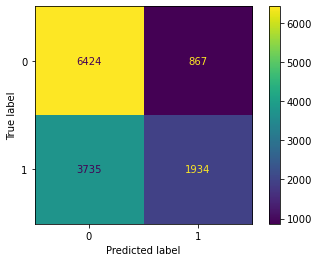

In [49]:
plot_confusion_matrix(pipe_dt, X_test, y_test);

In [50]:
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.63      0.88      0.74      7291
           1       0.69      0.34      0.46      5669

    accuracy                           0.64     12960
   macro avg       0.66      0.61      0.60     12960
weighted avg       0.66      0.64      0.61     12960



In [51]:
y_test.value_counts()

0    7291
1    5669
Name: FirstBasketAfterTO, dtype: int64

The split of the dependent variables were fairly evenly distributed, with a 56% and 44% split of misses and makes, so we can confirm that there is very little class imbalance.

Based on the confusion matrix, the results of our predictions were not so great, as the precision scores for both predicted misses and makes were below 70%, and the recall for the shots made were only 34%. This means that 63% of the time the model is correct in predicting a miss, and 69% of the time it is correct in predicting a make. However, the model is weak in distinguishing false negatives for a made basket, as it only recognizes a make from a miss 34% of the time. This means that the model will lose out on chances 66% of the time to inform us opportunities of a made basket after a timeout. The model however is very accurate in distinguishing a miss 88% of the time. This would mean that if the result was a miss, there would be more confidence in the result. If the result was a make however, there is a great chance that it is a false negative so the weight of the result may have to be taken with a grain of salt. 

With how the model is set up, the following conclusions can be made:


1. If the result is a miss from the model, a team can decide that it may be a wise choice to not call a time out since the precision is greater than 50%. 

2. If the result is a make from the model, a team can decide that it may be wise to call a timeout since the precision is greater than 50%.

It can be said that the recall score is not as important in this case as the false negatives do not have any consequence being misclassified. Since 66% of the shots are being misclassified as misses when they should be makes, the model has great room for improvement to capture the true prediction of shots. However, the coach who misses in opportunities to call a timeout is not negatively impacted by the missed opportunities to call timeouts.

Since the accuracy score is only 64% however, the model should not be used as a primary driver when deciding to call a timeout. The model should be used as a supplementary source when deciding to call a timeout.


#### Model Interpretation 

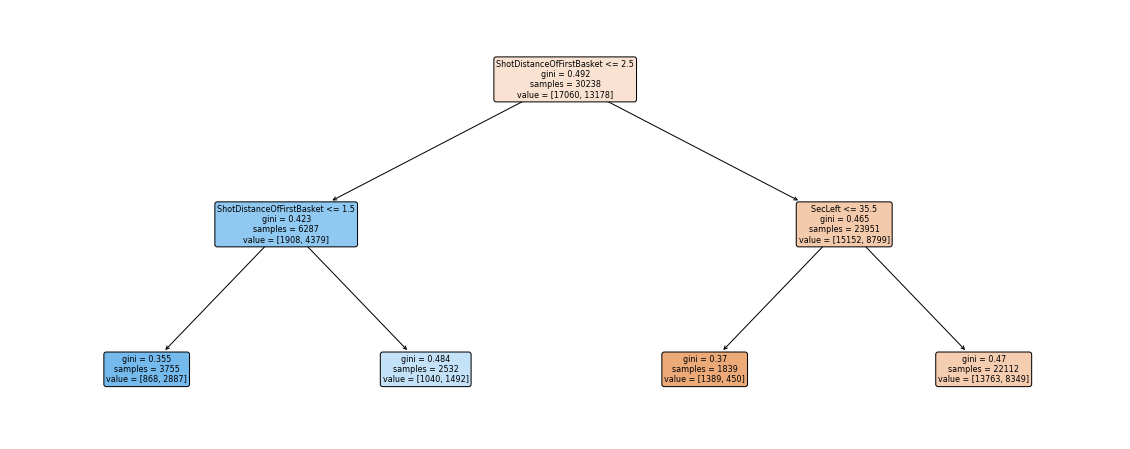

In [52]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20,8))

plot_tree(pipe_dt.named_steps['model'],
          feature_names=col_trans_dt.get_feature_names(),
          rounded=True,
          impurity=True,
          filled=True,
          ax=ax,
          fontsize=8)
plt.savefig('DecisionTree.png')
plt.show()


We see from the tree that there are two features which the model splits the data off of - the distance of a shot attempt and the seconds left in a quarter. 

The model tells us that if a shot is less than 2.5 feet away from the basket, it will likely result in a make and more likely if it is closer than 1.5 feet. This makes sense as obviously the shots that are closer to the basket have a much higher likelihood of being successful. 

Additionally, we saw that if the shot was greater than 2.5 feet but the time left in the quarter was less than 35.5 seconds, we saw instances of more baskets being missed. This may mean that calling timeouts during these closing moments of a quarter may give a greater chance of a miss for the offense on average. This is interesting as we saw that there may have been an indication that timeouts in general gave the defense an advantage as we saw much lower ranges of shot percentages for opponents after timeouts, which also is seen here as well.


---

### Actionable Insights

#### Drawing plays that aim to get lay ups and dunks

Teams assuming that a 3pt basket is not required should draw up plays that focus on shots that are closer to the basket. Based on the Decision Tree, the chance of a shot being made was significantly higher. Although we saw that the median shot distance went up when a shot was attempted after a timeout, it may be a better choice to go for closer shots.

#### Opting to not call a timeout in the closing seconds of a quarter when needing a three pointer

Based on our Decision Tree, we saw that there were more misses when shots that were farther than 2.5 feet were taken within the last 35.5 seconds of a quarter. This would indicate that if possible, if a three pointer is needed in the closing moments to opt to not call a timeout, and that shooting a 3pt shot in the flow of the game would lead to a better outcome. 

### Next Steps and Future Considerations

The following steps can be added to the model to improve its performance:

   1. Add additional features, such as the aggregate shots taken, rebounds, misses, makes, etc. that may influence the outcome of a shot prediction. 
    
    
   2. Avoid dropping columns based on inferences - Based on assumptions with basketball knowledge, columns that were thought to be irrelevant were dropped. However, it may have been better to keep these columns because they might have held information that would have helped in prediciting the outcome.
    
    
   3. Adding additional data from more seasons. Although it was assumed that with 4 seasons worth of data and 1.8 million initial rows of data were enough, the end data fed into the model after aggregation was only around 40,000 rows.
    
    
   4. Unsupervised models such as clustering would be highly effective for this dataset in showing which groups of features are alike in which can be extracted for optimal game strategy.
    
    
   5. Expanding on predicting a missed or made shot to predicting a made or missed 2pt/3pter. With this feature, the model will have many more use cases that will be optimized for more scenarios where a specific type of shot is needed.